1. Познакомьтесь с данными.
2. Осуществите предобработку данных.
    - 2.1 Приведите заголовки к удобному виду.
    - 2.2 Проверьте типы данных.
    - 2.3 Обработайте пропуски.
    - 2.4 Проверьте наличие дубликатов.
    - 2.5 Исключите нулевые значения в выручке для дальнейшего исследования. 
3. Исследовательский анализ данных:
     - 3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.
     - 3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.
     - 3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.
     - 3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.
     - 3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений. Для этого добавьте в датасет сведения о городах, используя данные из датасета:
     https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
     - 3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.

Каждый пункт исследования сопроводите выводами.


In [92]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

In [93]:
import pandas as pd
df = pd.read_csv('air_data.csv', sep=';') #импортируем данные

In [94]:
df

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11 00:00:00,2022-06-22 00:00:00,CHD,480,MOW,OMS,ВВЛ,NaN,ONLINE
49996,2022-06-06 00:00:00,2022-06-20 00:00:00,AD,270,LED,MOW,ВВЛ,NaN,OFFLINE
49997,2022-06-26 00:00:00,2022-06-29 00:00:00,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26 00:00:00,2022-06-28 00:00:00,AD,270,KZN,MOW,ВВЛ,NaN,OFFLINE


In [95]:
df.columns = map(str.lower, df.columns)

In [96]:
df

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11 00:00:00,2022-06-22 00:00:00,CHD,480,MOW,OMS,ВВЛ,NaN,ONLINE
49996,2022-06-06 00:00:00,2022-06-20 00:00:00,AD,270,LED,MOW,ВВЛ,NaN,OFFLINE
49997,2022-06-26 00:00:00,2022-06-29 00:00:00,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26 00:00:00,2022-06-28 00:00:00,AD,270,KZN,MOW,ВВЛ,NaN,OFFLINE


In [97]:
df.info() #выводим информацию по данным

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   issue_date         50000 non-null  object
 1   flight_date_loc    50000 non-null  object
 2   pax_type           50000 non-null  object
 3   revenue_amount     50000 non-null  int64 
 4   orig_city_code     49998 non-null  object
 5   dest_city_code     49999 non-null  object
 6   route_flight_type  50000 non-null  object
 7   ffp_flag           19398 non-null  object
 8   sale_type          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


In [98]:
print(df.shape)

(50000, 9)


1.Датасет содержит 50000 строк и 9 стобцов

2. 1 стобец (с суммой) имеет тип данных int 64 (целочисленные значения), 8 стобцов тип данных object. Столбцы с датами имеют типа данных object, это надо исправить

In [99]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format = '%Y%m%dT%H:%M:%S') #изменим тип данных для  столбца, применим нужный формат

In [100]:
df['flight_date_loc'] = pd.to_datetime(df['flight_date_loc'], format = '%Y%m%dT%H:%M:%S')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         50000 non-null  datetime64[ns]
 1   flight_date_loc    50000 non-null  datetime64[ns]
 2   pax_type           50000 non-null  object        
 3   revenue_amount     50000 non-null  int64         
 4   orig_city_code     49998 non-null  object        
 5   dest_city_code     49999 non-null  object        
 6   route_flight_type  50000 non-null  object        
 7   ffp_flag           19398 non-null  object        
 8   sale_type          50000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


In [102]:
df.isna() #выводим данные о пропущенных значениях

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,True,False
49996,False,False,False,False,False,False,False,True,False
49997,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,True,False


In [103]:
df.isna().sum() #выводим данные о количестве пропущенных значениях в каждом столбце

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           2
dest_city_code           1
route_flight_type        0
ffp_flag             30602
sale_type                0
dtype: int64

In [104]:
#Заполним пустые значения в столбце 'ffp_flag'
df['ffp_flag'] = df['ffp_flag'].fillna(0)
df['ffp_flag'].replace({'FFP' : 1}, inplace = True)

In [105]:
df

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE


In [106]:
df['ffp_flag'].unique()

array([0, 1], dtype=int64)

In [107]:
#узнаем, сколько значений в столбце 'revenue_amount' равны 0
df.loc[df['revenue_amount'] == 0].count()

issue_date           466
flight_date_loc      466
pax_type             466
revenue_amount       466
orig_city_code       466
dest_city_code       466
route_flight_type    466
ffp_flag             466
sale_type            466
dtype: int64

In [108]:
df.drop(df.loc[df['revenue_amount'] == 0].index, axis = 0, inplace = True)

In [109]:
df[df['orig_city_code'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
2020,2022-02-17,2022-03-22,AD,440,NaN,KHV,МВЛ,0,ONLINE
8100,2022-05-02,2022-05-11,AD,440,NaN,KHV,МВЛ,0,OFFLINE


In [110]:
df[df['dest_city_code'].isna()]

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
47582,2022-05-13,2022-07-28,AD,440,KHV,NaN,МВЛ,0,OFFLINE


In [111]:
df_1 = df.dropna()

In [112]:
df_1.isna().sum()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       0
dest_city_code       0
route_flight_type    0
ffp_flag             0
sale_type            0
dtype: int64

In [113]:
df_1[df_1.duplicated(keep=False)] #выведем все дубликаты, встречающиеся в датасете

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
337,2021-10-29,2021-11-12,AD,220,MOW,KZN,ВВЛ,1,ONLINE
338,2021-10-29,2021-11-12,AD,220,MOW,KZN,ВВЛ,1,ONLINE
649,2022-02-11,2022-08-03,AD,580,PKC,OVB,ВВЛ,0,OFFLINE
670,2022-02-11,2022-08-03,AD,580,PKC,OVB,ВВЛ,0,OFFLINE
716,2022-02-08,2022-08-01,AD,360,MMK,MOW,ВВЛ,0,OFFLINE
...,...,...,...,...,...,...,...,...,...
49360,2022-03-30,2022-05-03,AD,410,MOW,OVB,ВВЛ,1,ONLINE
49424,2022-03-30,2022-05-03,AD,410,MOW,OVB,ВВЛ,1,ONLINE
49677,2022-04-02,2022-05-02,AD,470,NUX,MOW,ВВЛ,0,ONLINE
49968,2022-06-28,2022-06-30,AD,950,MOW,HTA,ВВЛ,0,OFFLINE


In [114]:
#посмотрим на число дубликатов
print ('Число дубликатов - ',df_1.duplicated().sum())

Число дубликатов -  169


In [115]:
df_1.drop_duplicates(inplace=True) #удалим найденные дубликаты

C:\Users\София\AppData\Local\Temp\ipykernel_8252\2215465240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop_duplicates(inplace=True) #удалим найденные дубликаты


In [116]:
df_1[df_1.duplicated(keep=False)] #проверяем, не осталось ли дубликатов

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type


In [117]:
df_1.dropna (subset=['orig_city_code'])

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE


In [118]:
df_1 = df_1[df_1['revenue_amount'] != 0]

In [119]:
df_1

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE


# Исследовательский анализ данных

## 3.1 Создание отчета 

In [120]:
#создадим новую таблицу, в которой сгруппируем выручку по дате совершения покупки
df_2 = df_1.pivot_table(index = 'issue_date', aggfunc = 'sum', values = 'revenue_amount')
df_2

,revenue_amount
issue_date,
2021-10-01,60310
2021-10-02,33100
2021-10-03,34320
2021-10-04,58190
2021-10-05,60800
...,...
2022-09-26,39520
2022-09-27,48350
2022-09-28,44860


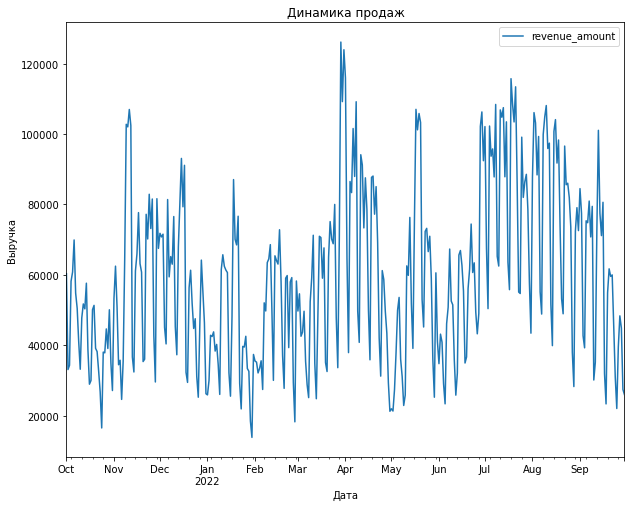

In [121]:
# построение линейного графика
df_2.plot(figsize = (10,8))
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Динамика продаж')
plt.show()

Повторим отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. 

In [122]:
# таблица по типам перелета
table_flight_type = df_1.pivot_table(index='issue_date', columns='route_flight_type', values='revenue_amount', aggfunc='sum')
table_flight_type


route_flight_type,ВВЛ,МВЛ
issue_date,,
2021-10-01,45710.0,14600.0
2021-10-02,26730.0,6370.0
2021-10-03,25940.0,8380.0
2021-10-04,48310.0,9880.0
2021-10-05,47580.0,13220.0
...,...,...
2022-09-26,36200.0,3320.0
2022-09-27,41900.0,6450.0
2022-09-28,31430.0,13430.0


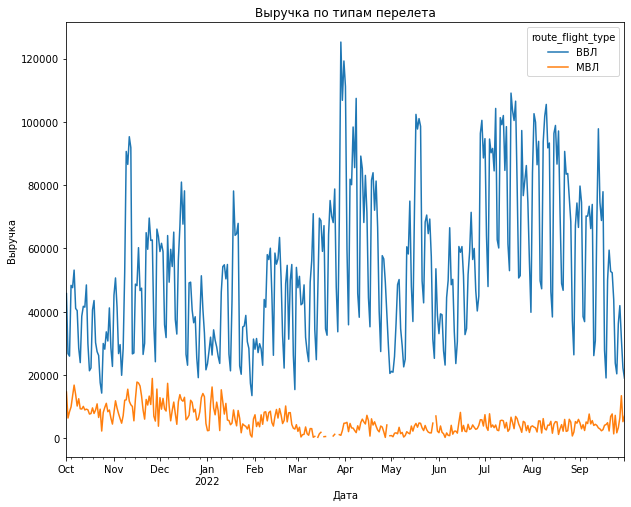

In [123]:
table_flight_type.plot(figsize = (10,8))
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Выручка по типам перелета')
plt.show()

In [124]:
# таблица по наличию программы лояльности
table_ffp_flag = df_1.pivot_table(index='issue_date', columns='ffp_flag', values='revenue_amount', aggfunc='sum')
table_ffp_flag

ffp_flag,0,1
issue_date,,
2021-10-01,38160,22150
2021-10-02,21020,12080
2021-10-03,18750,15570
2021-10-04,33330,24860
2021-10-05,33250,27550
...,...,...
2022-09-26,30020,9500
2022-09-27,37650,10700
2022-09-28,28150,16710


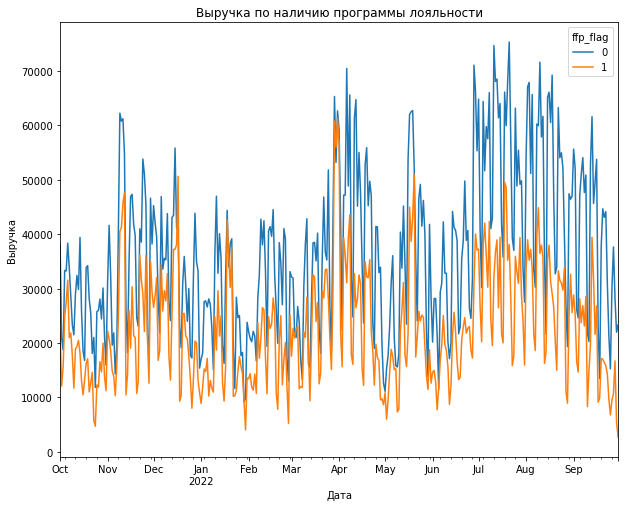

In [125]:
table_ffp_flag.plot(figsize = (10,8))
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Выручка по наличию программы лояльности')
plt.show()

In [126]:
# таблица по способам покупки
table_sale_type = df_1.pivot_table(index='issue_date', columns='sale_type', values='revenue_amount', aggfunc='sum')
table_sale_type

sale_type,OFFLINE,ONLINE
issue_date,,
2021-10-01,31530,28780
2021-10-02,16180,16920
2021-10-03,8270,26050
2021-10-04,26390,31800
2021-10-05,26910,33890
...,...,...
2022-09-26,22290,17230
2022-09-27,27080,21270
2022-09-28,25930,18930


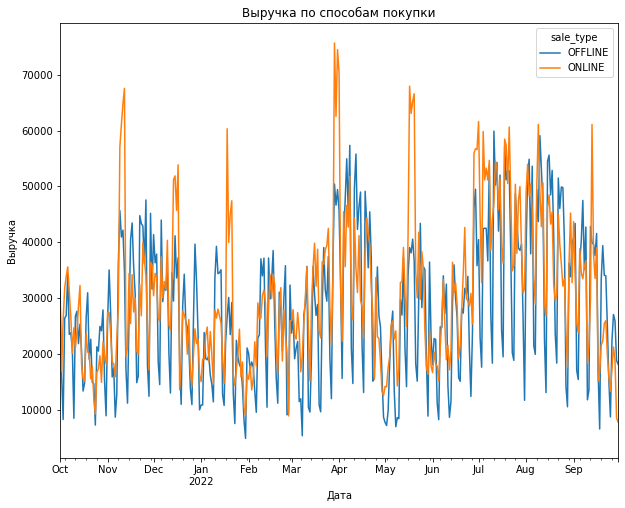

In [127]:
table_sale_type.plot(figsize = (10,8))
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Выручка по способам покупки')
plt.show()

In [128]:
# таблица по типам пассажиров 
table_pax_type = df_1.pivot_table(index='issue_date', columns='pax_type', values='revenue_amount', aggfunc='sum')
table_pax_type

pax_type,AD,CHD,INF
issue_date,,,
2021-10-01,55550.0,4760.0,NaN
2021-10-02,32740.0,360.0,NaN
2021-10-03,32070.0,2250.0,NaN
2021-10-04,56260.0,1620.0,310.0
2021-10-05,56550.0,4250.0,NaN
...,...,...,...
2022-09-26,38770.0,750.0,NaN
2022-09-27,47510.0,840.0,NaN
2022-09-28,44440.0,420.0,NaN


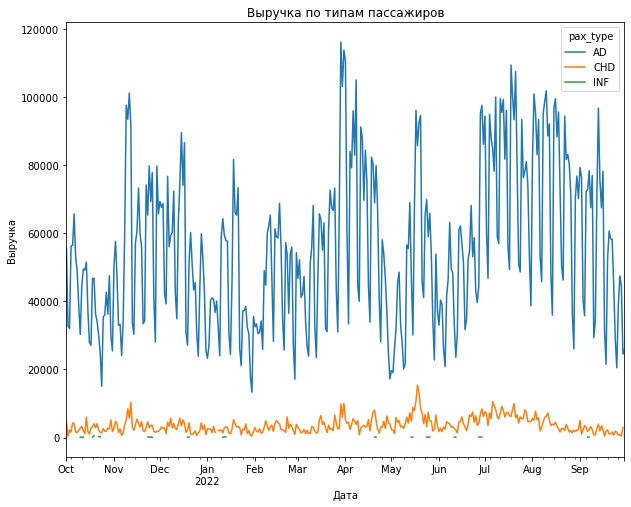

In [129]:
table_pax_type.plot(figsize = (10,8))
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Выручка по типам пассажиров')
plt.show()

In [130]:
# таблица по типам перелета
route_flight_type = df_1.pivot_table(index='issue_date', columns='route_flight_type', values='revenue_amount', aggfunc='sum')
route_flight_type

route_flight_type,ВВЛ,МВЛ
issue_date,,
2021-10-01,45710.0,14600.0
2021-10-02,26730.0,6370.0
2021-10-03,25940.0,8380.0
2021-10-04,48310.0,9880.0
2021-10-05,47580.0,13220.0
...,...,...
2022-09-26,36200.0,3320.0
2022-09-27,41900.0,6450.0
2022-09-28,31430.0,13430.0


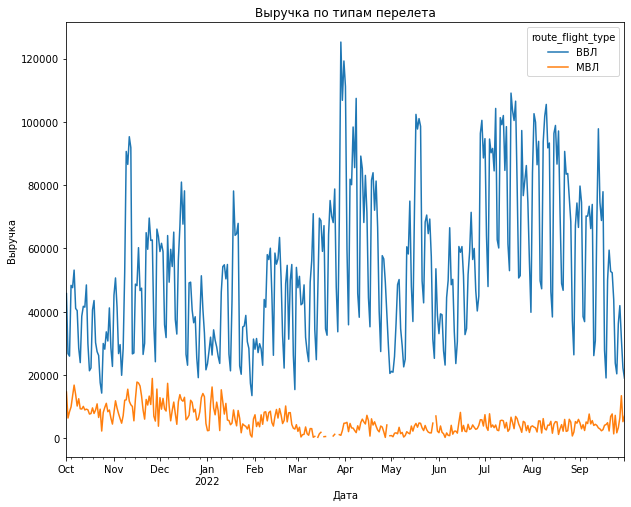

In [131]:
route_flight_type.plot(figsize = (10,8))
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Выручка по типам перелета')
plt.show()

In [132]:
# таблица по способам покупки
table_sale_type = df_1.pivot_table(index='issue_date', columns='sale_type', values='revenue_amount', aggfunc='sum')
table_sale_type

sale_type,OFFLINE,ONLINE
issue_date,,
2021-10-01,31530,28780
2021-10-02,16180,16920
2021-10-03,8270,26050
2021-10-04,26390,31800
2021-10-05,26910,33890
...,...,...
2022-09-26,22290,17230
2022-09-27,27080,21270
2022-09-28,25930,18930


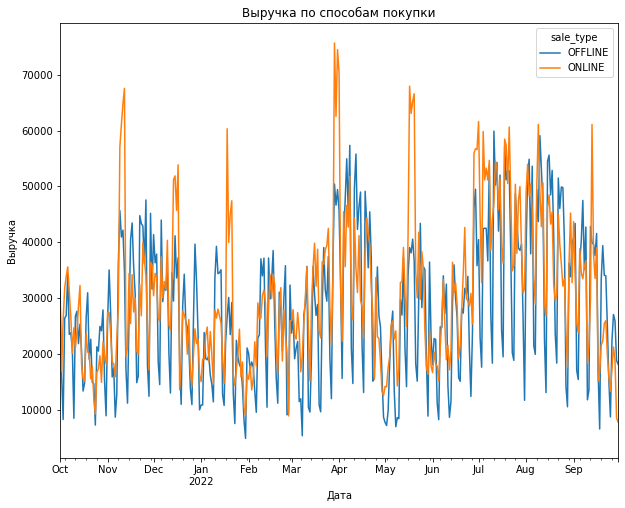

In [133]:
table_sale_type.plot(figsize = (10,8))
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Выручка по способам покупки')
plt.show()

In [134]:
# таблица по наличию программы лояльности
table_ffp_flag = df_1.pivot_table(index='issue_date', columns='ffp_flag', values='revenue_amount', aggfunc='sum')
table_ffp_flag

ffp_flag,0,1
issue_date,,
2021-10-01,38160,22150
2021-10-02,21020,12080
2021-10-03,18750,15570
2021-10-04,33330,24860
2021-10-05,33250,27550
...,...,...
2022-09-26,30020,9500
2022-09-27,37650,10700
2022-09-28,28150,16710


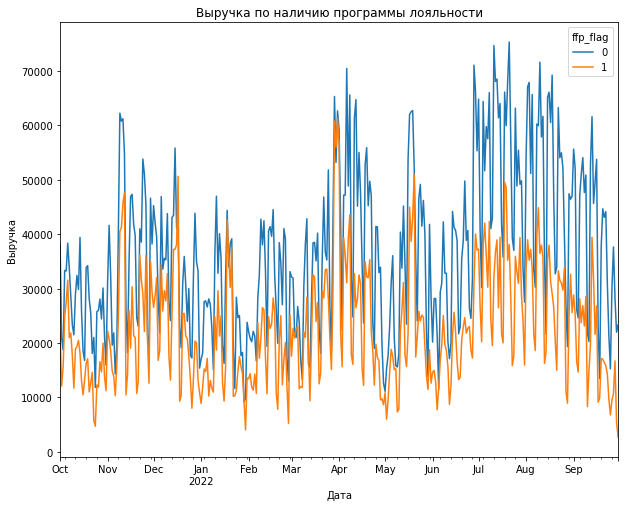

In [135]:
table_ffp_flag.plot(figsize = (10,8))
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Выручка по наличию программы лояльности')
plt.show()

In [136]:
total = df_1.pivot_table(index='issue_date', columns=['ffp_flag', 'sale_type', 'route_flight_type', 'pax_type'], values='revenue_amount', aggfunc='sum')
total

ffp_flag                 0                                                 \
sale_type          OFFLINE                                 ONLINE           
route_flight_type      ВВЛ                МВЛ                 ВВЛ           
pax_type                AD    CHD INF      AD     CHD INF      AD     CHD   
issue_date                                                                  
2021-10-01         16100.0  380.0 NaN  5400.0  1800.0 NaN  7930.0  2580.0   
2021-10-02          8100.0    NaN NaN  3290.0     NaN NaN  7200.0   360.0   
2021-10-03          3550.0  110.0 NaN  2850.0     NaN NaN  7980.0  1600.0   
2021-10-04         14910.0    NaN NaN  3830.0     NaN NaN  9380.0  1100.0   
2021-10-05         11680.0  570.0 NaN  5520.0  1470.0 NaN  9380.0  1740.0   
...                    ...    ...  ..     ...     ...  ..     ...     ...   
2022-09-26         18770.0  490.0 NaN     NaN     NaN NaN  7180.0   260.0   
2022-09-27         23140.0  840.0 NaN  1000.0     NaN NaN  7220.0     NaN   
2022-09-28         12770.0  420.0 NaN  3990.0     NaN NaN  6110.0     NaN   
2022-09-29         12150.0    NaN NaN  2770.0  2000.0 NaN  3660.0   940.0   
2022-09-30         13990.0    NaN NaN  4170.0     NaN NaN  2500.0     NaN   

ffp_flag                                          1                           \
sale_type                                   OFFLINE                   ONLINE   
route_flight_type            МВЛ                ВВЛ         МВЛ          ВВЛ   
pax_type             INF      AD    CHD INF      AD CHD      AD CHD       AD   
issue_date                                                                     
2021-10-01           NaN  3970.0    NaN NaN  7300.0 NaN   550.0 NaN  11420.0   
2021-10-02           NaN  2070.0    NaN NaN  3780.0 NaN  1010.0 NaN   7290.0   
2021-10-03           NaN  2660.0    NaN NaN  1760.0 NaN     NaN NaN  10400.0   
2021-10-04         310.0  3550.0  250.0 NaN  5940.0 NaN  1710.0 NaN  16400.0   
2021-10-05           NaN  2420.0  470.0 NaN  7670.0 NaN     NaN NaN  16540.0   
...                  ...     ...    ...  ..     ...  ..     ...  ..      ...   
2022-09-26           NaN  3320.0    NaN NaN  3030.0 NaN     NaN NaN   6470.0   
2022-09-27           NaN  5450.0    NaN NaN  2100.0 NaN     NaN NaN   8600.0   
2022-09-28           NaN  4860.0    NaN NaN  4750.0 NaN  4000.0 NaN   7380.0   
2022-09-29           NaN   450.0    NaN NaN  1960.0 NaN     NaN NaN   3530.0   
2022-09-30           NaN  2680.0    NaN NaN     NaN NaN     NaN NaN   2490.0   

ffp_flag                              
sale_type                             
route_flight_type            МВЛ      
pax_type             CHD      AD CHD  
issue_date                            
2021-10-01           NaN  2880.0 NaN  
2021-10-02           NaN     NaN NaN  
2021-10-03         540.0  2870.0 NaN  
2021-10-04         270.0   540.0 NaN  
2021-10-05           NaN  3340.0 NaN  
...                  ...     ...  ..  
2022-09-26           NaN     NaN NaN  
2022-09-27           NaN     NaN NaN  
2022-09-28           NaN   580.0 NaN  
2022-09-29           NaN     NaN NaN  
2022-09-30           NaN   150.0 NaN  

[365 rows x 20 columns]

Вывод: 
 1.  Самая большая выручка за весь год была представлена в апреле-мае, конце ноября, а также в летние месяцы, что, скорее всего, связано с тем, что большинство людей имеют отпуска в летнее время, а также наступает период школьных каникул. Самые низкие же показатели зафиксированы в феврале и начале ноября. 
 2. Выручка от ВВЛ гораздо больше, чем от МВЛ. Это может быть связано с тем, что в период коронавирусных ограничений большинство стран были закрыты для въезда, и после у населения снизилось желание путешествовать заграницу, и отдавать предпочтения городам России. 
 3. Также выручка от продаж больше среди пассажиров, которые не используют программу лояльности, это объясняется тем, что пассажиры с программами лояльности часто используют какие-либо бонусы и тд, что снижает стоимость билетов. 
 4. При способе покупки онлайн выручка также больше, чем при покупки офлайн, это связано с развитием технологий, что делает более комфортным покупку билетов в интернете, и большинство людей отдает предпочтение этому способу покупки. 
 5. Также выручка гораздо больше от взрослый людей, чем от детей, конечно, это следствие того, что взрослых людей путешествует гораздо больше, а также детские билеты стоят иногда дешевле, чем взрослые.

### 3.2

In [137]:
revenue_2 = df.groupby('issue_date')['revenue_amount'].sum()
revenue_2

issue_date
2021-10-01    60580
2021-10-02    33100
2021-10-03    34320
2021-10-04    58190
2021-10-05    60800
              ...  
2022-09-26    40660
2022-09-27    48350
2022-09-28    44860
2022-09-29    27460
2022-09-30    26440
Name: revenue_amount, Length: 365, dtype: int64

<AxesSubplot:xlabel='issue_date', ylabel='revenue_amount'>

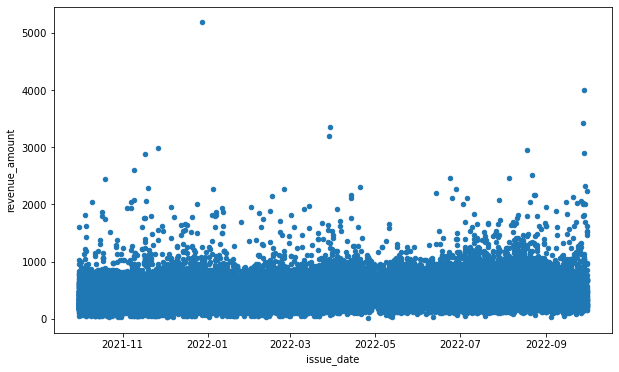

In [138]:
df.plot(kind='scatter',
          y='revenue_amount',
          x='issue_date',
          figsize=(10, 6))

<AxesSubplot:>

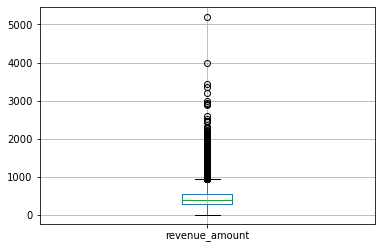

In [139]:
df_1.boxplot('revenue_amount')

In [140]:
stats_revenue = df_1['revenue_amount'].describe()
stats_revenue

count    49362.000000
mean       437.631579
std        214.611412
min         10.000000
25%        290.000000
50%        400.000000
75%        550.000000
max       5200.000000
Name: revenue_amount, dtype: float64

По данным описательной статистики мы видим, что общая выручка по всем данным равна 49362 рубля. Среднее значение по всем строкам - 437.632 рубля, а вот медианное значение равно 400 рублей. Стандартное отклоение от нашего среднего значения составляет 214.611 рублей. Минммальное и максимальное значение выручки соответсвенно равны 10 и 5200 рублей.

In [141]:
# определение границ выбросов по методу межквартильного расстояния
q1 = df_1['revenue_amount'].quantile(0.25)
q1 

290.0

Нижний квартиль показывает нам, что 25% наших наблюдений по выручке находятся ниже 290 рублей. 

In [142]:
q3 = df_1['revenue_amount'].quantile(0.75)
q3

550.0

Верхний квартиль показывает нам, что 75% наших наблюдений по выручке находятся ниже 550 рублей. 

In [143]:
iqr = q3 - q1
iqr

260.0

In [144]:
lower_bound = q1 - 1.5 * iqr
lower_bound

-100.0

Таким образом, мы рассчитали, что нижняя граница равна -100.

In [145]:
upper_bound = q3 + 1.5 * iqr
upper_bound

940.0

Верхняя граница по нашим данным равна 940.

По представленным данным, мы можем заметить, что несколько значений являются выбросами. Нижняя граница у нас отрицательная и равна -100, а вот верхняя равна 940. По предоставленному выше боксплоту мы наблюдаем, что большое количество значений располагается выше этой самой верхней границы, тогда тогда не получится снизить потери.

Попробуем удалить выбросы

In [146]:
df_1_filtered = df_1[(df_1['revenue_amount'] < upper_bound) & (df['revenue_amount'] > lower_bound)].reset_index(drop=True)
df_1_filtered

C:\Users\София\AppData\Local\Temp\ipykernel_8252\3101754162.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1_filtered = df_1[(df_1['revenue_amount'] < upper_bound) & (df['revenue_amount'] > lower_bound)].reset_index(drop=True)


,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE
...,...,...,...,...,...,...,...,...,...
48315,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE
48316,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE
48317,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE
48318,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE


<AxesSubplot:>

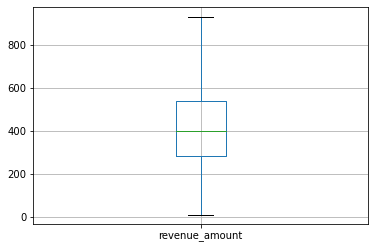

In [147]:
df_1_filtered.boxplot('revenue_amount')


Итак, мы удалили 1042 значения, так как наш датасет достаточно большой, то такое удаление можно считать, минимизацией потерь. 

### 3.3

In [148]:
#добавим столбец с месяцами
df_1['month'] = df_1['issue_date'].dt.month
df_1

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12
...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6


In [149]:
#добавим столбец с сезоном
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'autumn'

df_1['season'] = df_1['month'].apply(get_season)
df_1

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,winter
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,autumn
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,winter
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,winter
...,...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,summer
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,summer
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,summer
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,summer


Исследуем выручку по месяцам

In [150]:
revenue_month = pd.pivot_table(df_1, index = 'month', aggfunc = 'sum', values = 'revenue_amount')
revenue_month

,revenue_amount
month,
1,1352390
2,1347770
3,1826430
4,2032570
5,1713360
6,1614500
7,2638430
8,2471260
9,1669310


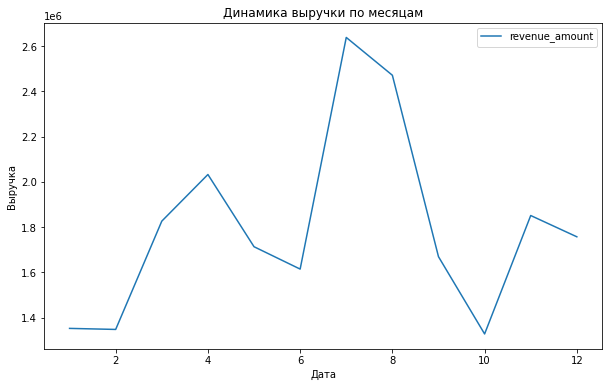

In [151]:
revenue_month.plot(figsize = (10, 6))
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Динамика выручки по месяцам')
plt.show()

Самый большой объём выручки мы наблюдаем в июле, а самый минимальный - октябре

Исследуем продажи билетов по месяцам

In [152]:
count_month = pd.pivot_table(df_1, index = 'month', aggfunc = 'count', values = 'revenue_amount')
count_month

,revenue_amount
month,
1,3589
2,3453
3,4326
4,3974
5,3621
6,3353
7,5259
8,4787
9,3648


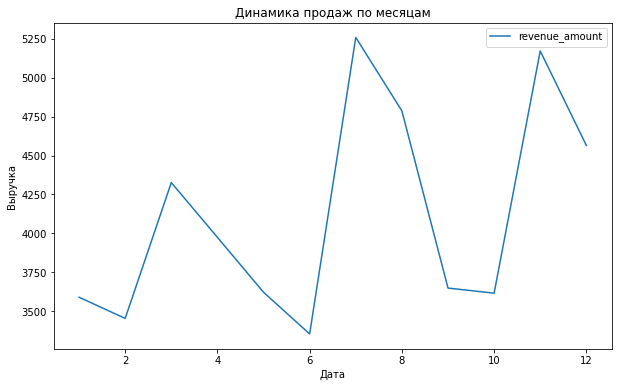

In [153]:
count_month.plot(figsize = (10, 6))
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Динамика продаж по месяцам')
plt.show()

Самый большой объём продаж мы наблюдаем в июле, как и в динамике с выручкой, а минимальную точку наблюдаем в июне.

Исследуем выручку по сезону

In [154]:
revenue_season = pd.pivot_table(df_1, index = 'season', aggfunc = 'sum', values = 'revenue_amount')
revenue_season

,revenue_amount
season,
autumn,4848410
spring,5572360
summer,6724190
winter,4457410


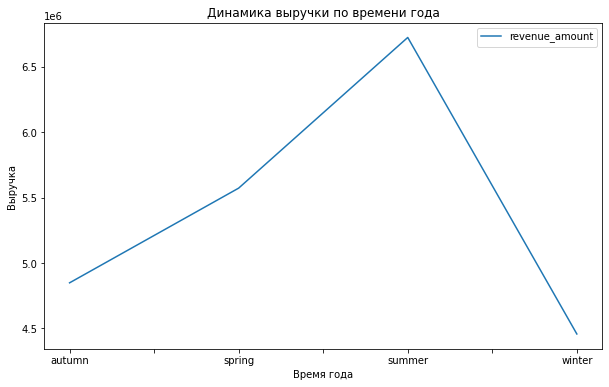

In [155]:
revenue_season.plot(figsize = (10, 6))
plt.xlabel('Время года')
plt.ylabel('Выручка')
plt.title('Динамика выручки по времени года')
plt.show()

Исследуем продажи билетов по сезону

In [156]:
count_season = pd.pivot_table(df_1, index = 'season', aggfunc = 'count', values = 'revenue_amount')
count_season

,revenue_amount
season,
autumn,12435
spring,11921
summer,13399
winter,11607


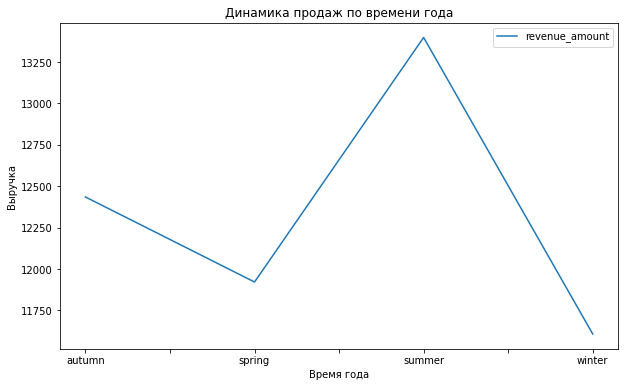

In [157]:
count_season.plot(figsize = (10, 6))
plt.xlabel('Время года')
plt.ylabel('Выручка')
plt.title('Динамика продаж по времени года')
plt.show()

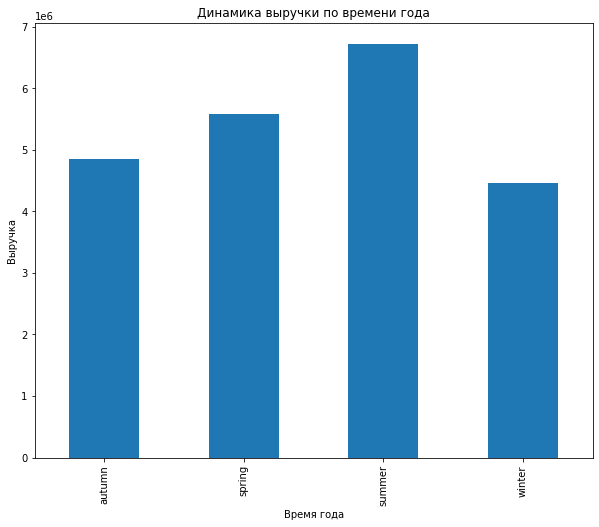

In [158]:
revenue_season.groupby("season")["revenue_amount"].sum().plot(kind='bar',figsize=(10,8))
plt.xlabel('Время года')
plt.ylabel('Выручка')
plt.title('Динамика выручки по времени года')
plt.show()

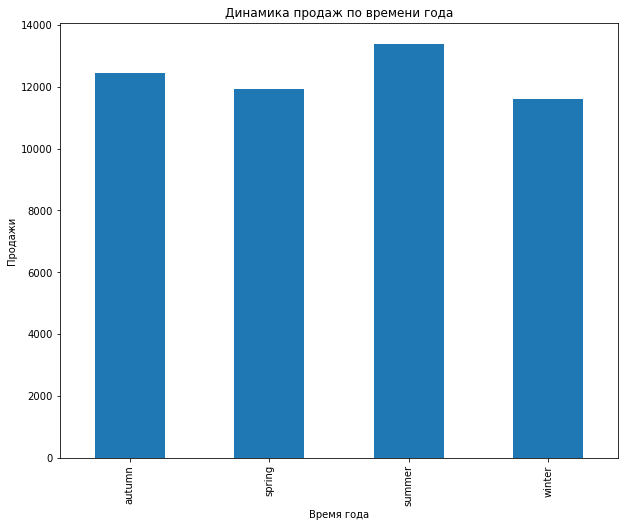

In [159]:
count_season.groupby("season")["revenue_amount"].sum().plot(kind='bar',figsize=(10,8))
plt.xlabel('Время года')
plt.ylabel('Продажи')
plt.title('Динамика продаж по времени года')
plt.show()

Вывод: Таким образом, построив графики мы видим, что максимальная выручка приходится на летний сезон, а минимальная - на зиму. Скорее всего, это связано  с тем, что у большинства людей отпуск именнно летом, а также наступают школьные каникулы у детей, поэтому чаще всего летают куда-либо именно летом. 
По такому же принципу мы видим, что и максимальное количество продаж, соответственно, приходится на лето, минимальное - на зиму. Связано это, скорее всего, с теми же условиями, что и в динамики выручки.

In [160]:
corr = df_1[['month','revenue_amount']].corr()

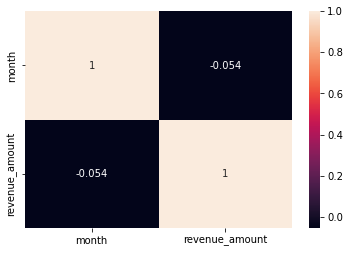

In [161]:
corr_2 = sns.heatmap(corr, annot=True)

Вывод: на основе выведенных данных мы можем сделать вывод, что связь практически отсутствует 

In [162]:
revenue_autumn = df_1[(df_1['month'] >= 9) & (df_1['month'] <= 11)]['revenue_amount']
revenue_autumn

2         390
5         250
7          70
9         280
11        380
         ... 
49623     310
49624     440
49625    1310
49626     400
49627     260
Name: revenue_amount, Length: 12435, dtype: int64

In [163]:
revenue_winter = df_1[(df_1['month'] >= 12) | (df_1['month'] <= 2)]['revenue_amount']
revenue_winter

0        200
1        610
3        190
4        190
6        200
        ... 
49571    510
49599    620
49604    390
49607    650
49618    770
Name: revenue_amount, Length: 11607, dtype: int64

In [164]:
print(np.mean(revenue_autumn))
print(np.mean(revenue_winter))

389.9002814636108
384.0277418799001


<AxesSubplot:>

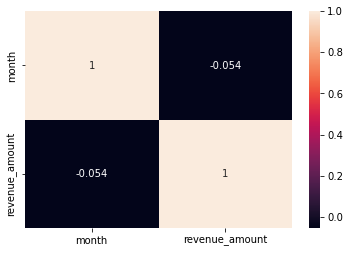

In [165]:
sns.heatmap(df_1[['month','revenue_amount']].corr(), annot = True)

Проверим гипотезу о том, что выручки за очень и зиму отличаются.

𝐻0: средние значения выручки за осень и за зиму не отличаются.
𝐻1: средние значения выручки за осень и за зиму отличаются.

Прежде, чем проверять гипотезу, следует проверить распределение наших данных на нормальность. 

Построим Q-Q plot:

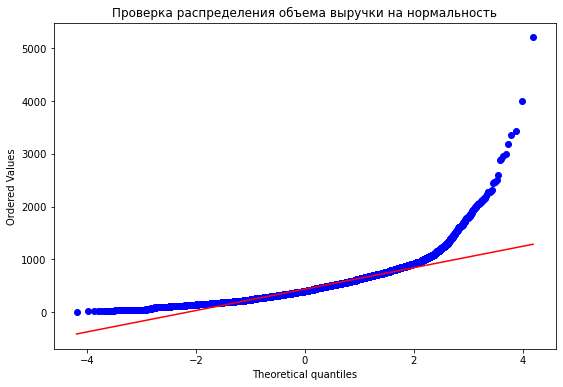

In [166]:
plt.figure(figsize=(9, 6))
# строим Q-Q plot:
st.probplot(df_1['revenue_amount'], dist='norm', plot=plt)
# настраиваем надписи:
plt.title('Проверка распределения объема выручки на нормальность')
# выводим рисунок на экран:
plt.show()

График нам дает понять, что распределение значений выручки не является нормальным, однако всё же проведём тест на нормальность.

Для проверки нашего распределения воспользуемся тестом Колмогорова-Смирнова

Сформулируем гипотезы:
𝐻0: выборка имеет нормальное распределение;
𝐻1: выборка не имеет нормального распределения.

In [167]:
# проводим тест Колмогорова-Смирнова:
stat, p = st.kstest(df_1['revenue_amount'], 'norm')
# выводим p-значение:
print(f'p-значение: {p}')
# вводим уровень значимости:
alpha = 0.05
# проверяем гипотезу:
if p < alpha:
    print('Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

p-значение: 0.0
Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


Выборка не имеет нормального распределения, сосбтвенно, что и требовалось доказать.

В связи с тем, что  наше распределение не является нормальным, для проверки гипотезы воспользуемся тестом Уилкоксона-Манна-Уитни, которому не нужны предположения о нормальности распределения:


In [168]:
import scipy
alpha = 0.05
revenue_autumn = df_1[(df_1['month'] >= 9) & (df_1['month'] <= 11)]['revenue_amount']
revenue_winter = df_1[(df_1['month'] >= 12) | (df_1['month'] <= 2)]['revenue_amount']
results = st.mannwhitneyu(revenue_autumn, revenue_winter)

print(results)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

MannwhitneyuResult(statistic=72736568.5, pvalue=0.2890358754641664)
p-value: 0.2890358754641664
Нет оснований отклонить нулевую гипотезу


Вывод: Из того, что мы не отклонили нашу нулевую гипотезу, мы делаем вывод, что с 95% вероятностью выручка от продаж осенью и зимой не отличается.

### 3.4

Добавим столбец с количеством дней между покупкой билета и отправлением рейса

In [169]:
df_1['duration_days'] = (df_1['flight_date_loc'] - df_1['issue_date']).dt.days
df_1

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,duration_days
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,winter,3
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,autumn,37
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,winter,28
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,winter,35
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,summer,11
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,summer,14
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,summer,3
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,summer,2


Группы: 
1 — приобретают билет в последний момент; 
2 — приобретают билет вовремя; 
3 — приобретают билет заранее.

In [170]:
p12 = np.percentile(df_1['duration_days'], 30)
p12

4.0

In [171]:
p23 = np.percentile(df_1['duration_days'], 70)
p23

20.0

Границы мы посчитали, теперь разберёмся с группами

In [172]:
df_1['number'] = pd.cut(df_1['duration_days'], 
                            bins=[-1, 4, 19, df_1['duration_days'].max()], 
                            labels=[1, 2, 3], 
                            right=True)
df_1


,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,duration_days,number
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35,3
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,winter,3,1
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,autumn,37,3
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,winter,28,3
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,winter,35,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,summer,11,2
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,summer,14,2
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,summer,3,1
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,summer,2,1


In [173]:
df_piv = df_1.pivot_table(index='number', 
                                    aggfunc=['sum', 
                                             lambda x: round(x.mean(), 2)], 
                                    values='revenue_amount').reset_index()
df_piv.columns = ['number', 'sum', 'mean']
df_piv

,number,sum,mean
0,1,6628020,431.76
1,2,8221230,437.98
2,3,6753120,443.12


Из этого можем сделать вывод, что выручка в группах 1 и 3, то есть в тех, что покупает в последний момент и заранее, не сильно отличается по сравнению с группой, которая покупает вовремя.

### Составление гипотез

Составим гипотезы:
𝐻0: средние значения выручки от продажи билетов группе лиц, которые покупают билеты в последниц момент, и группе лиц, покупающих билеты заранее равны.
𝐻1: средние значения выручки от продажи билетов группе лиц, которые покупают билеты в последниц момент, и группе лиц, покупающих билеты заранее не равны.

In [174]:
number_1 = df_1.query('number == 1')['revenue_amount']
number_3 = df_1.query('number == 3')['revenue_amount']
# проводим тест Уилкоксона-Манна-Уитни:
results = st.mannwhitneyu(number_1, number_3)
# выводим p-значение:
print('p-value:', results.pvalue)
# вводим уровень значимости:
alpha = 0.05
# сравниваем p-значение и уровень значимости и на основе этого решаем судьбу гипотезы:
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 1.7274679072460694e-34
Отклоняем нулевую гипотезу


Вывод: Так как мы отклонили нашу гипотезу, следовательно,  средние значения выручки от продажи билетов группе лиц, которые покупают билеты в последниц момент, и группе лиц, покупающих билеты заранее не равны 

### 3.5

In [175]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', names=['airport_name', 'city', 'country', 'orig_city_code', 'ICAO_code', 'latitude', 'longitude', 'altitude', 'timezone', 'U', 'region', 'type', 'fly'])
df_2

,airport_name,city,country,orig_city_code,ICAO_code,latitude,longitude,altitude,timezone,U,region,type,fly
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [176]:
#добавляем новый датасет
df_3 = pd.merge(df_1, df_2[['airport_name', 'city', 'country', 'orig_city_code']], on='orig_city_code',  how='left')
df_3

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,duration_days,number,airport_name,city,country
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35,3,NaN,NaN,NaN
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,winter,3,1,Yuzhno-Sakhalinsk Airport,Yuzhno-sakhalinsk,Russia
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,autumn,37,3,Khrabrovo Airport,Kaliningrad,Russia
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,winter,28,3,Voronezh International Airport,Voronezh,Russia
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,winter,35,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,summer,11,2,NaN,NaN,NaN
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,summer,14,2,Pulkovo Airport,St. Petersburg,Russia
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,summer,3,1,NaN,NaN,NaN
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,summer,2,1,Kazan International Airport,Kazan,Russia


Cохраняем два столбца

In [177]:
new = df_2[['city', 'orig_city_code']]
new.columns = ['orig_city_name', 'orig_city_code']
new

,orig_city_name,orig_city_code
1,Goroka,GKA
2,Madang,MAG
3,Mount Hagen,HGU
4,Nadzab,LAE
5,Port Moresby,POM
...,...,...
14106,Belaya,\N
14107,Ulan Ude,\N
14108,Novgorod,\N
14109,Copiapo,CPO


In [178]:
# считаем число пропусков:
new.isna().sum()

orig_city_name    49
orig_city_code     0
dtype: int64

In [179]:
new = new.query('orig_city_code != "\\\\N"').reset_index(drop=True)
new

,orig_city_name,orig_city_code
0,Goroka,GKA
1,Madang,MAG
2,Mount Hagen,HGU
3,Nadzab,LAE
4,Port Moresby,POM
...,...,...
6067,Sugapa-Papua Island,UGU
6068,Eilat,ETM
6069,Al Masna'ah,MNH
6070,Cagayan de Oro City,CGY


Посмотрим на пропущенные значения

In [180]:
new.query('orig_city_name.isna()')

,orig_city_name,orig_city_code
5794,NaN,DWD
5795,NaN,KMX
5808,NaN,BPH
5809,NaN,MXI
5826,NaN,BGN
5829,NaN,VLK
5832,NaN,RTC
5838,NaN,ARY
5839,NaN,BLN
5840,NaN,BZD


Посмотрим пересечение множеств, не имеющих соответствующих им городов и кодов, которые находятся в изначальнов датасете

In [181]:
new_2 = new.query('orig_city_name.isna()')['orig_city_code']
print(set(new) & set(df_1["orig_city_code"]))
print(set(new) & set(df_1["dest_city_code"]))

set()
set()


Значит можем просто удалить

In [182]:
# презаписываем датасет, удаляя пропуски:
new = new.query('orig_city_name.notna()').reset_index(drop=True)
# выводим датасет:
new

,orig_city_name,orig_city_code
0,Goroka,GKA
1,Madang,MAG
2,Mount Hagen,HGU
3,Nadzab,LAE
4,Port Moresby,POM
...,...,...
6028,Sugapa-Papua Island,UGU
6029,Eilat,ETM
6030,Al Masna'ah,MNH
6031,Cagayan de Oro City,CGY


In [183]:
df_2 = df_2.rename(columns={'orig_city_code': 'dest_city_code'})

In [184]:
#добавляем новый датасет
df_4 = pd.merge(df_3, df_2[['airport_name', 'city', 'country', 'dest_city_code']], on='dest_city_code',  how='left')
df_4

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,duration_days,number,airport_name_x,city_x,country_x,airport_name_y,city_y,country_y
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35,3,NaN,NaN,NaN,Khrabrovo Airport,Kaliningrad,Russia
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,winter,3,1,Yuzhno-Sakhalinsk Airport,Yuzhno-sakhalinsk,Russia,Tolmachevo Airport,Novosibirsk,Russia
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,autumn,37,3,Khrabrovo Airport,Kaliningrad,Russia,NaN,NaN,NaN
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,winter,28,3,Voronezh International Airport,Voronezh,Russia,NaN,NaN,NaN
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,winter,35,3,NaN,NaN,NaN,Krasnodar Pashkovsky International Airport,Krasnodar,Russia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,summer,11,2,NaN,NaN,NaN,Omsk Central Airport,Omsk,Russia
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,summer,14,2,Pulkovo Airport,St. Petersburg,Russia,NaN,NaN,NaN
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,summer,3,1,NaN,NaN,NaN,Kazan International Airport,Kazan,Russia
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,summer,2,1,Kazan International Airport,Kazan,Russia,NaN,NaN,NaN


In [185]:
df_4 = df_4.rename(columns={'airport_name_x' : 'orig_airport_name', 'city_x' : 'orig_city', 'country_x' : 'orig_country', 'airport_name_y': 'dest_airport_name', 'city_y' : 'dest_city', 'country_y' : 'dest_country'})
df_4

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,duration_days,number,orig_airport_name,orig_city,orig_country,dest_airport_name,dest_city,dest_country
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35,3,NaN,NaN,NaN,Khrabrovo Airport,Kaliningrad,Russia
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,winter,3,1,Yuzhno-Sakhalinsk Airport,Yuzhno-sakhalinsk,Russia,Tolmachevo Airport,Novosibirsk,Russia
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,autumn,37,3,Khrabrovo Airport,Kaliningrad,Russia,NaN,NaN,NaN
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,winter,28,3,Voronezh International Airport,Voronezh,Russia,NaN,NaN,NaN
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,winter,35,3,NaN,NaN,NaN,Krasnodar Pashkovsky International Airport,Krasnodar,Russia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,summer,11,2,NaN,NaN,NaN,Omsk Central Airport,Omsk,Russia
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,summer,14,2,Pulkovo Airport,St. Petersburg,Russia,NaN,NaN,NaN
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,summer,3,1,NaN,NaN,NaN,Kazan International Airport,Kazan,Russia
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,summer,2,1,Kazan International Airport,Kazan,Russia,NaN,NaN,NaN


In [186]:
# переименовываем столбцы:
new.columns = ['dest_city_name', 'dest_city_code']
# выводим первые 5 строк:
new.head()

,dest_city_name,dest_city_code
0,Goroka,GKA
1,Madang,MAG
2,Mount Hagen,HGU
3,Nadzab,LAE
4,Port Moresby,POM


In [189]:
# добавляем города назначения:
df_4 = df_4.merge(new, on='dest_city_code', how='left')
# выводим датасет:
df_4

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,duration_days,number,orig_airport_name,orig_city,orig_country,dest_airport_name,dest_city,dest_country,dest_city_name
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35,3,NaN,NaN,NaN,Khrabrovo Airport,Kaliningrad,Russia,Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,winter,3,1,Yuzhno-Sakhalinsk Airport,Yuzhno-sakhalinsk,Russia,Tolmachevo Airport,Novosibirsk,Russia,Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,autumn,37,3,Khrabrovo Airport,Kaliningrad,Russia,NaN,NaN,NaN,NaN
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,winter,28,3,Voronezh International Airport,Voronezh,Russia,NaN,NaN,NaN,NaN
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,winter,35,3,NaN,NaN,NaN,Krasnodar Pashkovsky International Airport,Krasnodar,Russia,Krasnodar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,summer,11,2,NaN,NaN,NaN,Omsk Central Airport,Omsk,Russia,Omsk
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,summer,14,2,Pulkovo Airport,St. Petersburg,Russia,NaN,NaN,NaN,NaN
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,summer,3,1,NaN,NaN,NaN,Kazan International Airport,Kazan,Russia,Kazan
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,summer,2,1,Kazan International Airport,Kazan,Russia,NaN,NaN,NaN,NaN


In [190]:
df_4.isna().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           0
dest_city_code           0
route_flight_type        0
ffp_flag                 0
sale_type                0
month                    0
season                   0
duration_days            0
number                   0
orig_airport_name    16188
orig_city            16188
orig_country         16188
dest_airport_name    16297
dest_city            16297
dest_country         16297
dest_city_name       16297
dtype: int64

В столбцах 'orig_city_name' и 'dest_city_name' много пропусков

In [192]:
orig = set(df_4.query('orig_city.isna()')['orig_city_code'])
dest = set(df_4.query('dest_city_name.isna()')['dest_city_code'])
new_3 = orig | dest
new_3

{'BAK',
 'BER',
 'BJS',
 'GRV',
 'LON',
 'MIL',
 'MOW',
 'NQZ',
 'OHH',
 'PAR',
 'ROM',
 'SEL',
 'TOX',
 'TYO'}

In [194]:
# создаем словарь:
name = {'BAK': 'Baku', 'BER': 'Berlin', 'GRV': 'Grozny', 'LON': 'London', 'MIL': 'Milan', 'MOW': 'Moscow', 
               'NQZ': 'Astana', 'OHH': 'Okha', 'PAR': 'Paris', 'ROM': 'Rome', 'SEL': 'Seoul', 'TOX': 'Tobolsk', 'TYO': 'Tokyo'}
# заполняем пропуски:
df_4['orig_city'] = df_4['orig_city'].fillna(df_4['orig_city_code'].map(name))
df_4['dest_city_name'] = df_4['dest_city_name'].fillna(df_4['dest_city_code'].map(name))
# выводим датасет:
df_4

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,duration_days,number,orig_airport_name,orig_city,orig_country,dest_airport_name,dest_city,dest_country,dest_city_name
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,winter,35,3,NaN,Moscow,NaN,Khrabrovo Airport,Kaliningrad,Russia,Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,winter,3,1,Yuzhno-Sakhalinsk Airport,Yuzhno-sakhalinsk,Russia,Tolmachevo Airport,Novosibirsk,Russia,Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,autumn,37,3,Khrabrovo Airport,Kaliningrad,Russia,NaN,NaN,NaN,Moscow
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,winter,28,3,Voronezh International Airport,Voronezh,Russia,NaN,NaN,NaN,Moscow
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,winter,35,3,NaN,Moscow,NaN,Krasnodar Pashkovsky International Airport,Krasnodar,Russia,Krasnodar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,summer,11,2,NaN,Moscow,NaN,Omsk Central Airport,Omsk,Russia,Omsk
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,summer,14,2,Pulkovo Airport,St. Petersburg,Russia,NaN,NaN,NaN,Moscow
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,summer,3,1,NaN,Moscow,NaN,Kazan International Airport,Kazan,Russia,Kazan
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,summer,2,1,Kazan International Airport,Kazan,Russia,NaN,NaN,NaN,Moscow


In [196]:
# создаем новый столбец:
df_4['direction'] = df_4['orig_city'] + '-' + df_4['dest_city_name']
df_4

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,...,duration_days,number,orig_airport_name,orig_city,orig_country,dest_airport_name,dest_city,dest_country,dest_city_name,direction
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,0,ONLINE,12,...,35,3,NaN,Moscow,NaN,Khrabrovo Airport,Kaliningrad,Russia,Kaliningrad,Moscow-Kaliningrad
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,0,OFFLINE,12,...,3,1,Yuzhno-Sakhalinsk Airport,Yuzhno-sakhalinsk,Russia,Tolmachevo Airport,Novosibirsk,Russia,Novosibirsk,Yuzhno-sakhalinsk-Novosibirsk
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,1,ONLINE,11,...,37,3,Khrabrovo Airport,Kaliningrad,Russia,NaN,NaN,NaN,Moscow,Kaliningrad-Moscow
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,0,ONLINE,12,...,28,3,Voronezh International Airport,Voronezh,Russia,NaN,NaN,NaN,Moscow,Voronezh-Moscow
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,1,OFFLINE,12,...,35,3,NaN,Moscow,NaN,Krasnodar Pashkovsky International Airport,Krasnodar,Russia,Krasnodar,Moscow-Krasnodar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49357,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,0,ONLINE,6,...,11,2,NaN,Moscow,NaN,Omsk Central Airport,Omsk,Russia,Omsk,Moscow-Omsk
49358,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,0,OFFLINE,6,...,14,2,Pulkovo Airport,St. Petersburg,Russia,NaN,NaN,NaN,Moscow,St. Petersburg-Moscow
49359,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,1,ONLINE,6,...,3,1,NaN,Moscow,NaN,Kazan International Airport,Kazan,Russia,Kazan,Moscow-Kazan
49360,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,0,OFFLINE,6,...,2,1,Kazan International Airport,Kazan,Russia,NaN,NaN,NaN,Moscow,Kazan-Moscow


In [197]:
mvl = df_4[df_4['route_flight_type'] == 'МВЛ']

In [198]:
vvl = df_4[df_4['route_flight_type'] == 'ВВЛ']

In [199]:
#выделим топ-10 по МВЛ и оценим выручку
mvl_gr = mvl.groupby(['direction']).agg({'revenue_amount': 'sum', 'route_flight_type': 'count'}).reset_index()
df_5 = mvl_gr.sort_values('route_flight_type', ascending=False).head(10)
df_5

,direction,revenue_amount,route_flight_type
170,Moscow-Osh,72100,154
102,Khudzhand-Moscow,97160,146
229,Osh-Moscow,80920,136
161,Moscow-Khudzhand,58750,130
214,Novosibirsk-Osh,51930,122
202,Novosibirsk-Bishkek,49040,121
104,Khudzhand-Novosibirsk,57740,116
231,Osh-Novosibirsk,57970,116
141,Moscow-Antalya,46900,107
30,Bishkek-Novosibirsk,48300,102


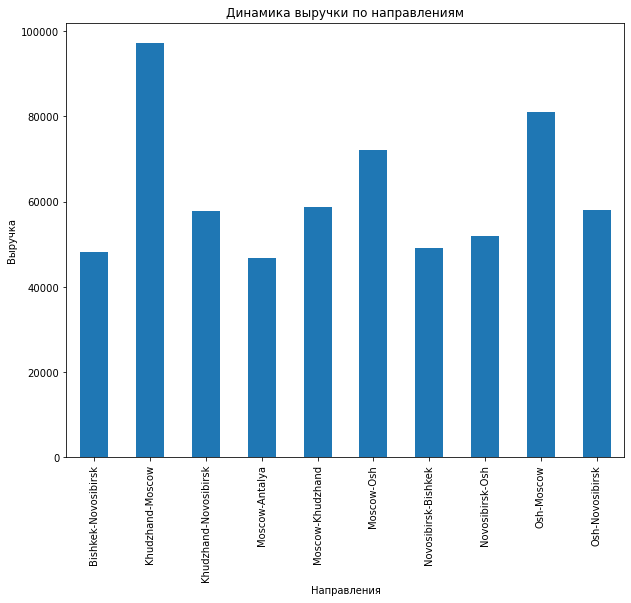

In [200]:
df_5.groupby("direction")["revenue_amount"].sum().plot(kind='bar',figsize=(10,8))
plt.xlabel('Направления')
plt.ylabel('Выручка')
plt.title('Динамика выручки по направлениям')
plt.show()

Вывод: проанализировав и сгруппировав рейсы по типу перелёта: МВЛ, мы можем сказать, что самым популярным направлением, среди представленных данных, является рейс Москва-Ос, обратное направление входит также в топ-3 по популярности. Второе по количеству перелетов среди международных рейсов занимает направление Худжанд - Москва, и на 4 месте расположилось обратное направление. Также популярность. пользуются рейсы из Новосибирска в Ос и Манас. При этом стоит учесть, что рейтинг по выручке, среди представленных направленний, разнится с рейтингом по популярности. Так, например, в топ 10 направлений по популрности первое место по выручке занимает направление Худжанд-Москва (выроучка здесь составила 97160 рублей), второе и третье место по объёму выручки достались направлениям Ос-Москва и Москва-Ос, соответственно (80920 и 72100). 

In [201]:
#выделим топ-10 по МВЛ и оценим выручку
vvl_gr = vvl.groupby(['direction']).agg({'revenue_amount': 'sum', 'route_flight_type': 'count'}).reset_index()
df_6 = vvl_gr.sort_values('route_flight_type', ascending=False).head(10)
df_6

,direction,revenue_amount,route_flight_type
266,Sochi-Moscow,534530,1341
143,Moscow-Sochi,500770,1309
271,St. Petersburg-Moscow,282110,1212
144,Moscow-St. Petersburg,275790,1192
201,Novosibirsk-Moscow,467540,972
130,Moscow-Novosibirsk,460050,956
55,Kazan-Moscow,206390,760
112,Moscow-Kazan,205960,758
148,Moscow-Ufa,210610,708
218,Novosibirsk-Sochi,413700,695


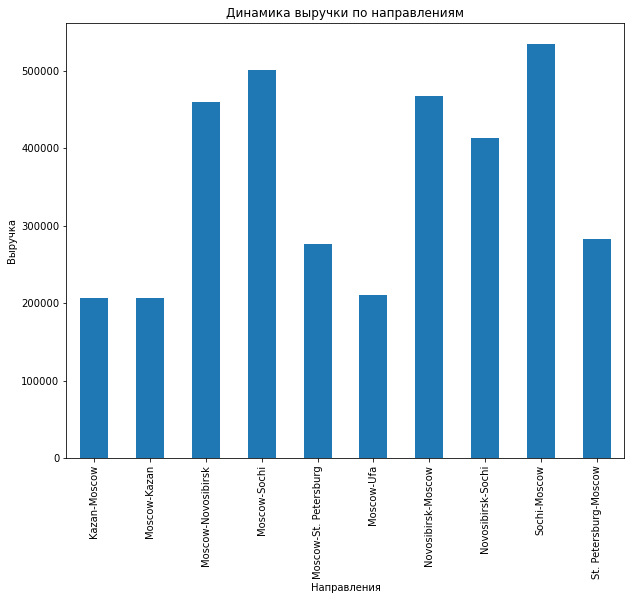

In [202]:
df_6.groupby("direction")["revenue_amount"].sum().plot(kind='bar',figsize=(10,8))
plt.xlabel('Направления')
plt.ylabel('Выручка')
plt.title('Динамика выручки по направлениям')
plt.show()

Вывод: проанализировав и сгруппировав рейсы по типу перелёта: ВВЛ, мы можем сказать, что самым популярным направлением, среди представленных данных, является рейс Сочи-Москва, а обратное направление расположилось на 2 месте. Следующие же места по популярности занимает направление Санкт-Петербург-Москва и его обратное направление. Закрывает этот топ-10 направление Новосибирск - Сочи. Здесь первые два места по объёму выручки совпадают с первыми двумя местами по популярности (Сочи-Москва (534530) и Москва-Сочи(500770), а вот третье и четвертое место по объёму выручки занимают направление новосибирск-Москва и его обратное направление (467540 и 460050).

### 3.6

У нас почти все признаки категориальные, поэтому стоит привести их все к числовому виду, чтобы строить матрицу корреляций.

In [203]:
# создадим копию
df_2 = df_1.copy()
# преобразуем категориальные признаки в числовые:
df_2[['pax_type', 'route_flight_type',
     'ffp_flag', 'sale_type', 'month']] = df_2[['pax_type', 'route_flight_type',
                                                 'ffp_flag', 'sale_type', 'month']].apply(lambda x: pd.factorize(x)[0])
df_2

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,month,season,duration_days,number
0,2021-12-07,2022-01-11,0,200,MOW,KGD,0,0,0,0,winter,35,3
1,2021-12-31,2022-01-03,0,610,UUS,OVB,0,0,1,0,winter,3,1
2,2021-11-28,2022-01-04,0,390,KGD,MOW,0,1,0,1,autumn,37,3
3,2021-12-08,2022-01-05,0,190,VOZ,MOW,0,0,0,0,winter,28,3
4,2021-12-08,2022-01-12,0,190,MOW,KRR,0,1,1,0,winter,35,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,1,480,MOW,OMS,0,0,0,4,summer,11,2
49996,2022-06-06,2022-06-20,0,270,LED,MOW,0,0,1,4,summer,14,2
49997,2022-06-26,2022-06-29,0,230,MOW,KZN,0,1,0,4,summer,3,1
49998,2022-06-26,2022-06-28,0,270,KZN,MOW,0,0,1,4,summer,2,1


In [204]:
corr_matrics = df_2.corr()
corr_matrics

,pax_type,revenue_amount,route_flight_type,ffp_flag,sale_type,month,duration_days
pax_type,1.000000,-0.081266,0.053630,-0.159187,-0.050517,-0.001824,0.091688
revenue_amount,-0.081266,1.000000,0.100767,-0.046345,0.162313,0.127438,0.030329
route_flight_type,0.053630,0.100767,1.000000,-0.159557,0.102862,-0.108414,-0.067653
ffp_flag,-0.159187,-0.046345,-0.159557,1.000000,-0.320530,-0.022776,0.022474
sale_type,-0.050517,0.162313,0.102862,-0.320530,1.000000,0.008258,-0.123557
month,-0.001824,0.127438,-0.108414,-0.022776,0.008258,1.000000,-0.006232
duration_days,0.091688,0.030329,-0.067653,0.022474,-0.123557,-0.006232,1.000000


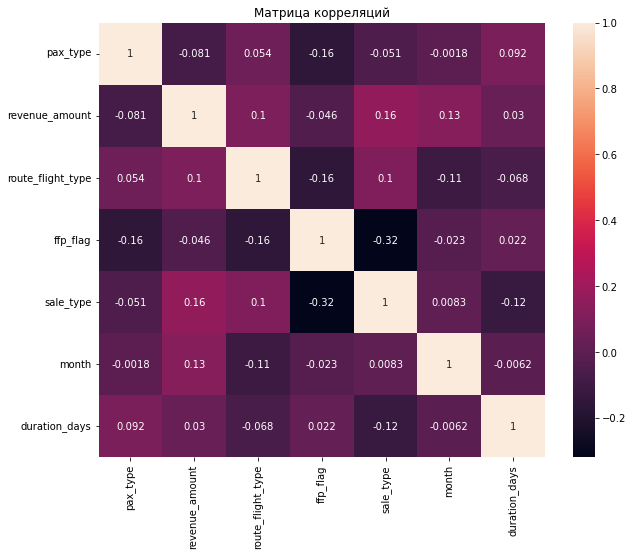

In [205]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrics, annot=True)
plt.title( 'Матрица корреляций')
plt.show()

Вывод: В матрице корреляции представлена связь между всеми признаками. Мы можем наблюдать отрицательные значения, которые далеки от 1, следовательно, это говорит нам о том, что связь между выручкой и наличием программы лояльности, типом пассажиров, между типом пассажиров и наличием программы лояльности, способом покупки, месяцем, между типом перелёта и месяцем, между наличием программы лояльности и способом покупки вообще отсутвует. Но помимо этих признаков, где мы наблюдаем отрицательные значения, связь между всеми представленными призанками достаточно слабая, ведь все значения далеки от 1. Самое близкое к 1 значение и более тесная связь, по сравнению с другими, между выручкой и способом покупки. 